In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cust_acqusition = pd.read_csv(r"C:\Users\Sonu Mandal\OneDrive\Desktop\python_foun\Customer Acqusition.csv")

In [3]:
spend = pd.read_csv(r"C:\Users\Sonu Mandal\OneDrive\Desktop\python_foun\spend.csv",)

In [4]:
repayment_data1 = pd.read_csv(r"C:\Users\Sonu Mandal\OneDrive\Desktop\python_foun\Repayment.csv")

In [5]:
cust_acqusition.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [48]:
# Ques...a. In case age is less than 18, replace it with mean of age values.
mean_age = cust_acqusition['Age'].mean()
cust_acqusition.loc[cust_acqusition['Age']<18,'Age']=mean_age

In [49]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [50]:
cust_spend=pd.merge(cust_acqusition,spend,on='Customer',how='outer') # join customer acqusition and spend table

In [51]:
cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [52]:
# Ques.. b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
cust_spend.loc[cust_spend['Amount']>cust_spend['Limit'],'Amount']=cust_spend['Limit']*0.5

In [11]:

k14=repayment_data1.drop('Unnamed: 4',axis=1) ## K14 is variable in which I have assigned repayment data fro treating the null values

In [12]:
k14.dropna(inplace=True)

In [13]:
cust_acqusition.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [14]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [58]:
final_data=pd.merge(cust_spend,k14,on='Customer',how='outer') # K14 is repayment data

In [59]:
final_data.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,SL No:,Month_y,Amount_y
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2.0,3-Jan-04,245899.02
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,3.0,15-Jan-04,259490.06
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,4.0,25-Jan-04,437555.12
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,5.0,17-Jan-05,165972.88
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,6.0,23-Feb-05,365366.62


In [60]:
final_data.rename(columns={"Month_x":"Spend_Month","Amount_x": "Spend_Amount","Month_y":"Repayment_Month",
                   "Amount_y":"Repayment_Amount"},inplace=True)

In [61]:
final_data.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Spend_Month,Type,Spend_Amount,SL No:,Repayment_Month,Repayment_Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2.0,3-Jan-04,245899.02
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,3.0,15-Jan-04,259490.06
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,4.0,25-Jan-04,437555.12
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,5.0,17-Jan-05,165972.88
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,6.0,23-Feb-05,365366.62


In [62]:
# Ques..c. Incase the repayment amount is more than the limit, replace the repayment with the limit.
final_data.loc[final_data['Repayment_Amount']>final_data['Limit'],'Repayment_Amount']=final_data['Limit']

In [63]:
final_data.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Spend_Month,Type,Spend_Amount,SL No:,Repayment_Month,Repayment_Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2.0,3-Jan-04,245899.02
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,3.0,15-Jan-04,259490.06
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,4.0,25-Jan-04,437555.12
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,5.0,17-Jan-05,165972.88
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,6.0,23-Feb-05,365366.62


In [65]:
# Ques..a. How many distinct customers exist?

final_data['Customer'].unique()

# Ans. Total 100 distinct customers present in dataset

array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29',
       'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38',
       'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47',
       'A48', 'A49', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56',
       'A57', 'A58', 'A59', 'A60', 'A61', 'A62', 'A63', 'A64', 'A65',
       'A66', 'A67', 'A68', 'A69', 'A70', 'A71', 'A72', 'A73', 'A74',
       'A75', 'A76', 'A77', 'A78', 'A79', 'A80', 'A81', 'A82', 'A83',
       'A84', 'A85', 'A86', 'A87', 'A88', 'A89', 'A90', 'A91', 'A92',
       'A93', 'A94', 'A95', 'A96', 'A97', 'A98', 'A99', 'A100'],
      dtype=object)

In [66]:
#Ques.. b. How many distinct categories exist

final_data['Type'].unique()

# Ans 15 categories present in the dataset

array(['JEWELLERY', 'PETRO', 'CLOTHES', 'FOOD', 'CAMERA', 'SANDALS',
       'CAR', 'TRAIN TICKET', 'BUS TICKET', 'AIR TICKET', 'MOVIE TICKET',
       'RENTAL', 'BIKE', 'AUTO', 'SHOPPING'], dtype=object)

In [67]:
final_data['Spend_Month']=pd.to_datetime(final_data['Spend_Month'])
final_data['Repayment_Month']=pd.to_datetime(final_data['Repayment_Month'])
j11=final_data['Spend_Month'].dt.strftime('%B')
k11=final_data['Repayment_Month'].dt.strftime('%B')
final_data['Spend_month_x']=j11
final_data['Repayment_Month_x']=k11

In [69]:
# Ques..c. What is the average monthly spend by customers?


# first derive the monthly spend by customer
monthly_spend = final_data.groupby(['Customer','Spend_month_x'])['Spend_Amount'].sum().reset_index()

# then compute mean of a customer by spend 
gt=pd.DataFrame(monthly_spend.groupby('Customer')['Spend_Amount'].mean()).round(2)


gt.head()

,Spend_Amount
Customer,
A1,12489420.99
A10,8656705.46
A100,50000.00
A11,9034455.38
A12,23061324.53


In [70]:
final_data

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Spend_Month,Type,Spend_Amount,SL No:,Repayment_Month,Repayment_Amount,Spend_month_x,Repayment_Month_x
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,2.0,2004-01-03,245899.02,January,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,3.0,2004-01-15,259490.06,January,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,4.0,2004-01-25,437555.12,January,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,5.0,2005-01-17,165972.88,January,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,6.0,2005-02-23,365366.62,January,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37261,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,98.0,2004-01-25,100000.00,January,January
37262,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,99.0,2004-01-12,10000.00,January,January
37263,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,100.0,2004-01-03,10001.00,January,January
37264,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,101.0,2004-01-15,10002.00,January,January


In [71]:
# Ques.. d. What is the average monthly repayment by customers?

# first derive the monthly repay spend by customer
repay_spend=final_data.groupby(['Customer','Repayment_Month_x'])['Repayment_Amount'].sum().reset_index()

# then compute mean of a customer by repay spend
avg_repay_spend=pd.DataFrame(repay_spend.groupby('Customer')['Repayment_Amount'].mean()).round(2)

avg_repay_spend.head()

,Repayment_Amount
Customer,
A1,12774830.76
A10,11086942.56
A100,69551.19
A11,13656687.51
A12,25837756.50


In [72]:
# Ques..e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

# compute the monthly repayment amount by customer
monthly_repayment=pd.DataFrame(final_data.groupby('Repayment_Month_x')['Repayment_Amount'].sum())

# convert the amount from scientific to readable numbers
monthly_repayment['Repayment_Amount']=monthly_repayment['Repayment_Amount'].apply(lambda x:round(x))

# compute the monthly spend amount by customer
monthly_spend=pd.DataFrame(final_data.groupby('Spend_month_x')['Spend_Amount'].sum())

# convert the amount from scientific to readable numbers
monthly_spend['Spend_Amount'] = monthly_spend['Spend_Amount'].apply(lambda x:round(x))

# compute the monthly profit
monthly_profit = monthly_repayment['Repayment_Amount']-monthly_spend['Spend_Amount']


# compute the interest earned by the bank each month
interest=pd.DataFrame(monthly_profit[monthly_profit>0]*0.029).round(2)

interest

,0
Repayment_Month_x,
April,3843786.44
August,602084.14
December,1162763.87
February,280654.40
January,155577.29
July,579269.49
March,1351196.74
May,13361401.33
November,488284.48


In [73]:
# Ques..f. What are the top 5 product types?

# compute the product wise spend
prod_spend=pd.DataFrame(final_data.groupby('Type')['Spend_Amount'].sum())

# convert the amount from scientific to readable numbers
prod_spend['Spend_Amount'] = prod_spend['Spend_Amount'].apply(lambda x: round(x))

# find the top 5 product types by customer spend
prod_spend.nlargest(5,'Spend_Amount')

,Spend_Amount
Type,
CAMERA,751331453
PETRO,706560457
FOOD,547243524
AIR TICKET,539771063
TRAIN TICKET,533412041


In [74]:
# Ques.. g. Which city is having maximum spend?

# compute the city wise spend
city_spend=pd.DataFrame(final_data.groupby('City')['Spend_Amount'].sum())

 # convert the amount from scientific to readable numbers
city_spend['Spend_Amount']=city_spend['Spend_Amount'].apply(lambda x: round(x))

# find the city having maximum spend
city_spend.nlargest(1,'Spend_Amount')

,Spend_Amount
City,
COCHIN,1175903213


In [75]:
final_data['Age']

0        76.0
1        76.0
2        76.0
3        76.0
4        76.0
         ... 
37261    54.0
37262    58.0
37263    51.0
37264    35.0
37265    36.0
Name: Age, Length: 37266, dtype: float64

In [76]:
bins = [18,30,50,float('inf')]
labels = [ 'Young Adult', 'Adult', 'Senior']

# to determine the age group wise spend I have categorise the age into age group 
final_data['Age_group']=pd.cut(final_data['Age'],bins=bins,labels=labels,right=False) 

#  Ques..h. Which age group is spending more money?

# then compute the age group wise spend
age_group_wise_spend=pd.DataFrame(final_data.groupby('Age_group')['Spend_Amount'].sum())

# convert the amount from scientific to readable numbers
age_group_wise_spend['Spend_Amount']=age_group_wise_spend['Spend_Amount'].apply(lambda x:round(x))

# and then we have found the age group whose spending is more
age_group_wise_spend.nlargest(1,'Spend_Amount')

,Spend_Amount
Age_group,
Adult,2268571046


In [77]:
#Ques.. i. Who are the top 10 customers in terms of repayment

# first take the customer wise repayment sum
cust_wise_repay=pd.DataFrame(final_data.groupby('Customer')['Repayment_Amount'].sum())

# convert the scientific number to readable number
cust_wise_repay['Repayment_Amount']=cust_wise_repay['Repayment_Amount'].apply(lambda x : round(x))

# then found the top 10 customer in terms of repayment
cust_wise_repay.nlargest(10,'Repayment_Amount')

,Repayment_Amount
Customer,
A61,400487431
A60,375299048
A13,296732020
A43,263186015
A45,261898381
A12,258377565
A14,246241328
A44,240086634
A39,236296982


In [78]:
final_data.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Spend_Month,Type,Spend_Amount,SL No:,Repayment_Month,Repayment_Amount,Spend_month_x,Repayment_Month_x,Age_group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,2.0,2004-01-03,245899.02,January,January,Senior
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,3.0,2004-01-15,259490.06,January,January,Senior
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,4.0,2004-01-25,437555.12,January,January,Senior
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,5.0,2005-01-17,165972.88,January,January,Senior
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,6.0,2005-02-23,365366.62,January,February,Senior


In [79]:
final_data['Spend_Year']=final_data['Spend_Month'].dt.year # add the year column

In [80]:
# Ques..Calculate the city wise spend on each product on yearly basis.


# make pivot table
pvt_table=pd.pivot_table(final_data,values='Spend_Amount',index=['Spend_Year','City'],columns='Product',aggfunc='sum',
                         fill_value=0)


# reset index because the city and year converted to a column
pvt_table.reset_index(inplace=True)



# convert the scientific number to readable number
pvt_table[['Gold','Platimum','Silver']]=pvt_table[['Gold','Platimum','Silver']].apply(lambda x:round(x))


pvt_table

Product,Spend_Year,City,Gold,Platimum,Silver
0,2004,BANGALORE,245353892.0,29426569.0,28450890.0
1,2004,BOMBAY,187728352.0,23440736.0,17558938.0
2,2004,CALCUTTA,206156656.0,60838321.0,7900114.0
3,2004,CHENNAI,23616080.0,103475013.0,4146619.0
4,2004,COCHIN,186219682.0,77046315.0,17184165.0
5,2004,DELHI,78076192.0,5103232.0,18059029.0
6,2004,PATNA,41661304.0,20035253.0,19749593.0
7,2004,TRIVANDRUM,65207777.0,66861977.0,3819369.0
8,2005,BANGALORE,355355071.0,22425263.0,18538096.0
9,2005,BOMBAY,248808585.0,18337559.0,15196574.0


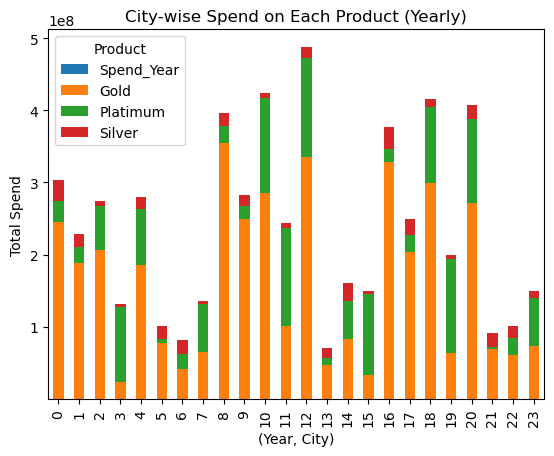

In [81]:
pvt_table.plot(kind='bar',stacked=True)
plt.xlabel('(Year, City)')
plt.ylabel('Total Spend')
plt.title('City-wise Spend on Each Product (Yearly)')
plt.legend(title='Product')

Text(0.5, 1.0, 'Monthly comparison of total spends')

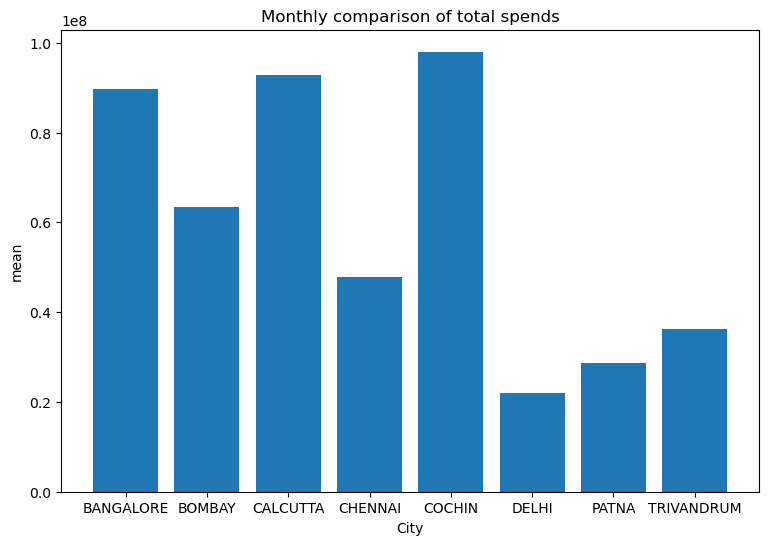

In [82]:
# . Monthly comparison of total spends, city wise
spd=pd.DataFrame(final_data.groupby(['City','Spend_month_x'])['Spend_Amount'].sum().reset_index())

spd['Spend_Amount']=spd['Spend_Amount'].apply(lambda x: round(x))

spd_mean=pd.DataFrame(spd.groupby('City')['Spend_Amount'].mean())

spd_mean['Spend_Amount']=spd_mean['Spend_Amount'].apply(lambda x: round(x))

plt.figure(figsize=(9,6))
plt.bar(spd_mean.index,spd_mean['Spend_Amount'])
plt.xlabel('City')
plt.ylabel('mean')
plt.title('Monthly comparison of total spends')

In [83]:
#  Ques...b. Comparison of yearly spend on air tickets

# create pivot table for type wise spend
type_wise_spd=pd.pivot_table(final_data,values='Spend_Amount',columns='Type',index='Spend_Year',aggfunc='sum',fill_value=0)

In [84]:

# reset index so that year becomes columns
type_wise_spd.reset_index(inplace=True)




In [85]:
# convert the scientific number to readable number
type_wise_spd[['AIR TICKET','AUTO','BIKE',
               'BUS TICKET','CAMERA',
               'CAR','CLOTHES','FOOD',
               'JEWELLERY','MOVIE TICKET',
              'PETRO','RENTAL','SANDALS',
               'SHOPPING','TRAIN TICKET']]=type_wise_spd[['AIR TICKET','AUTO','BIKE',
                                                          'BUS TICKET','CAMERA','CAR',
                                                          'CLOTHES','FOOD',
                                                          'JEWELLERY','MOVIE TICKET',
                                                           'PETRO','RENTAL','SANDALS',
                                                          'SHOPPING','TRAIN TICKET']].apply(lambda x:round(x))

In [86]:
type_wise_spd

Type,Spend_Year,AIR TICKET,AUTO,BIKE,BUS TICKET,CAMERA,CAR,CLOTHES,FOOD,JEWELLERY,MOVIE TICKET,PETRO,RENTAL,SANDALS,SHOPPING,TRAIN TICKET
0,2004,112682288.0,1254498.0,3148586.0,160995648.0,273526551.0,51838564.0,71027599.0,205253260.0,66360730.0,48224186.0,162676516.0,113161382.0,20727886.0,170965668.0,75272703.0
1,2005,287803079.0,33040741.0,126143865.0,187559911.0,278444514.0,1313081.0,122248434.0,181198843.0,100919412.0,125011976.0,282968571.0,97643387.0,33455687.0,135232716.0,222607064.0
2,2006,139285696.0,78811911.0,56005953.0,69609404.0,199360389.0,49995125.0,130648214.0,160791421.0,133815022.0,179841135.0,260915371.0,131197191.0,22441337.0,141887147.0,235532274.0


In [87]:
type_wise_spd[['Spend_Year','AIR TICKET']]

Type,Spend_Year,AIR TICKET
0,2004,112682288.0
1,2005,287803079.0
2,2006,139285696.0


Text(0.5, 1.0, 'Comparison of yearly spend on air tickets')

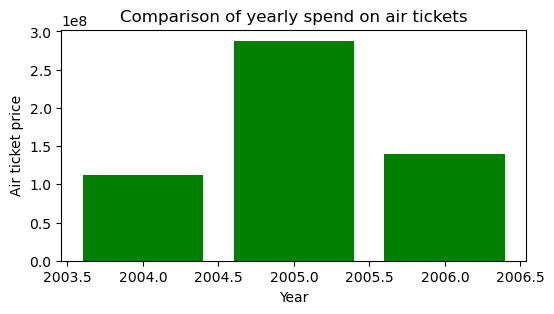

In [88]:
plt.figure(figsize=(6,3))
plt.bar(type_wise_spd['Spend_Year'],type_wise_spd['AIR TICKET'],color='green')
plt.xlabel('Year')
plt.ylabel('Air ticket price')
plt.title('Comparison of yearly spend on air tickets')

In [89]:
final_data.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Spend_Month,Type,Spend_Amount,SL No:,Repayment_Month,Repayment_Amount,Spend_month_x,Repayment_Month_x,Age_group,Spend_Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,2.0,2004-01-03,245899.02,January,January,Senior,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,3.0,2004-01-15,259490.06,January,January,Senior,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,4.0,2004-01-25,437555.12,January,January,Senior,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,5.0,2005-01-17,165972.88,January,January,Senior,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,6.0,2005-02-23,365366.62,January,February,Senior,2004


In [90]:
# Ques... Comparison of monthly spend for each product

product_spent = pd.pivot_table(final_data,values='Spend_Amount',columns='Product',index='Spend_month_x')

product_spent.reset_index(inplace=True)

product_spent[['Gold','Platimum','Silver']]=product_spent[['Gold','Platimum','Silver']].apply(lambda x: round(x))

In [91]:
product_spent

Product,Spend_month_x,Gold,Platimum,Silver
0,April,237996.0,93643.0,49324.0
1,August,234430.0,123918.0,49494.0
2,December,191791.0,60782.0,41192.0
3,February,225687.0,116375.0,48906.0
4,January,251082.0,118760.0,50688.0
5,July,288071.0,93151.0,53309.0
6,June,266423.0,165485.0,52134.0
7,March,230735.0,89413.0,51432.0
8,May,246597.0,107550.0,50842.0
9,November,248745.0,91658.0,48423.0


Text(0.5, 1.0, 'Monthly Spend for Each Product (Area Chart)')

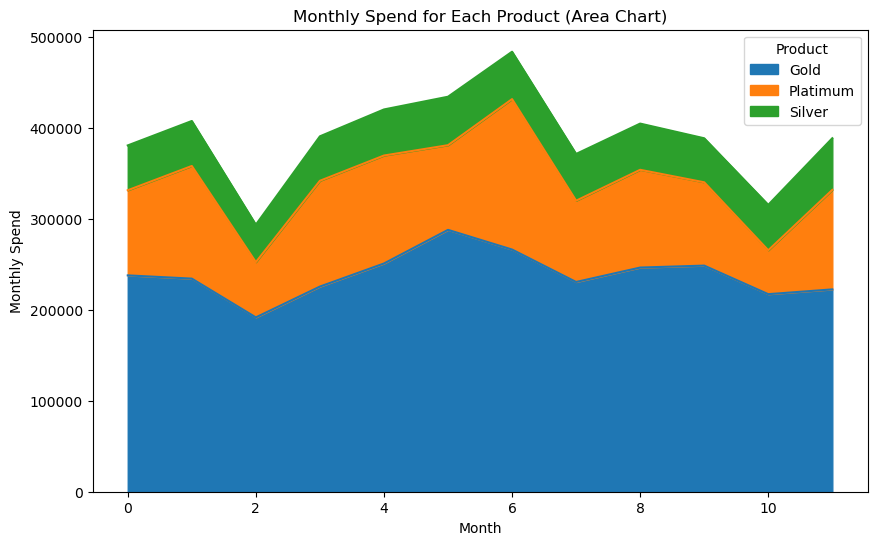

In [92]:
product_spent.plot(kind='area',figsize=(10,6))
plt.xlabel('Month')
plt.ylabel('Monthly Spend')
plt.title('Monthly Spend for Each Product (Area Chart)')